In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
sess=tf.InteractiveSession()
x  =tf.placeholder(tf.float32,shape=[None,784]) #28*28
y_ =tf.placeholder(tf.float32,shape=[None,10])
W  =tf.Variable(tf.zeros([784,10]),tf.float32)
b  =tf.Variable(tf.zeros([10]),tf.float32)

sess.run( tf.initialize_all_variables() )

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [3]:
y=tf.nn.softmax( tf.matmul(x,W)+b )
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))
train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [4]:
for i in range(1000):
    batch=mnist.train.next_batch(50)
    train_step.run(feed_dict={x:batch[0], y_:batch[1]})

In [6]:
correct_prediction=tf.equal(tf.argmax(y,1),tf.arg_max(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
acc=accuracy.eval(feed_dict={x:mnist.test.images, y_:mnist.test.labels})*100
print ("Accuracy of the ANN is {}".format(acc) )

Accuracy of the ANN is 91.50999784469604


In [7]:
sess.close()

In [39]:
batch

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0., 

In [20]:
import numpy as np

In [37]:
i=2
img=np.reshape(batch[0][i],[28,28])
y_t=batch[1][i]
print(y_t)

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


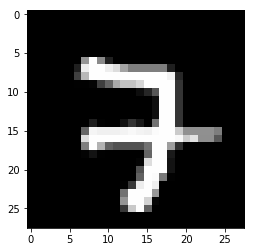

In [38]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img,cmap="gray")